##     **Customer Churn Prediction Using ANN - Classification Problem**

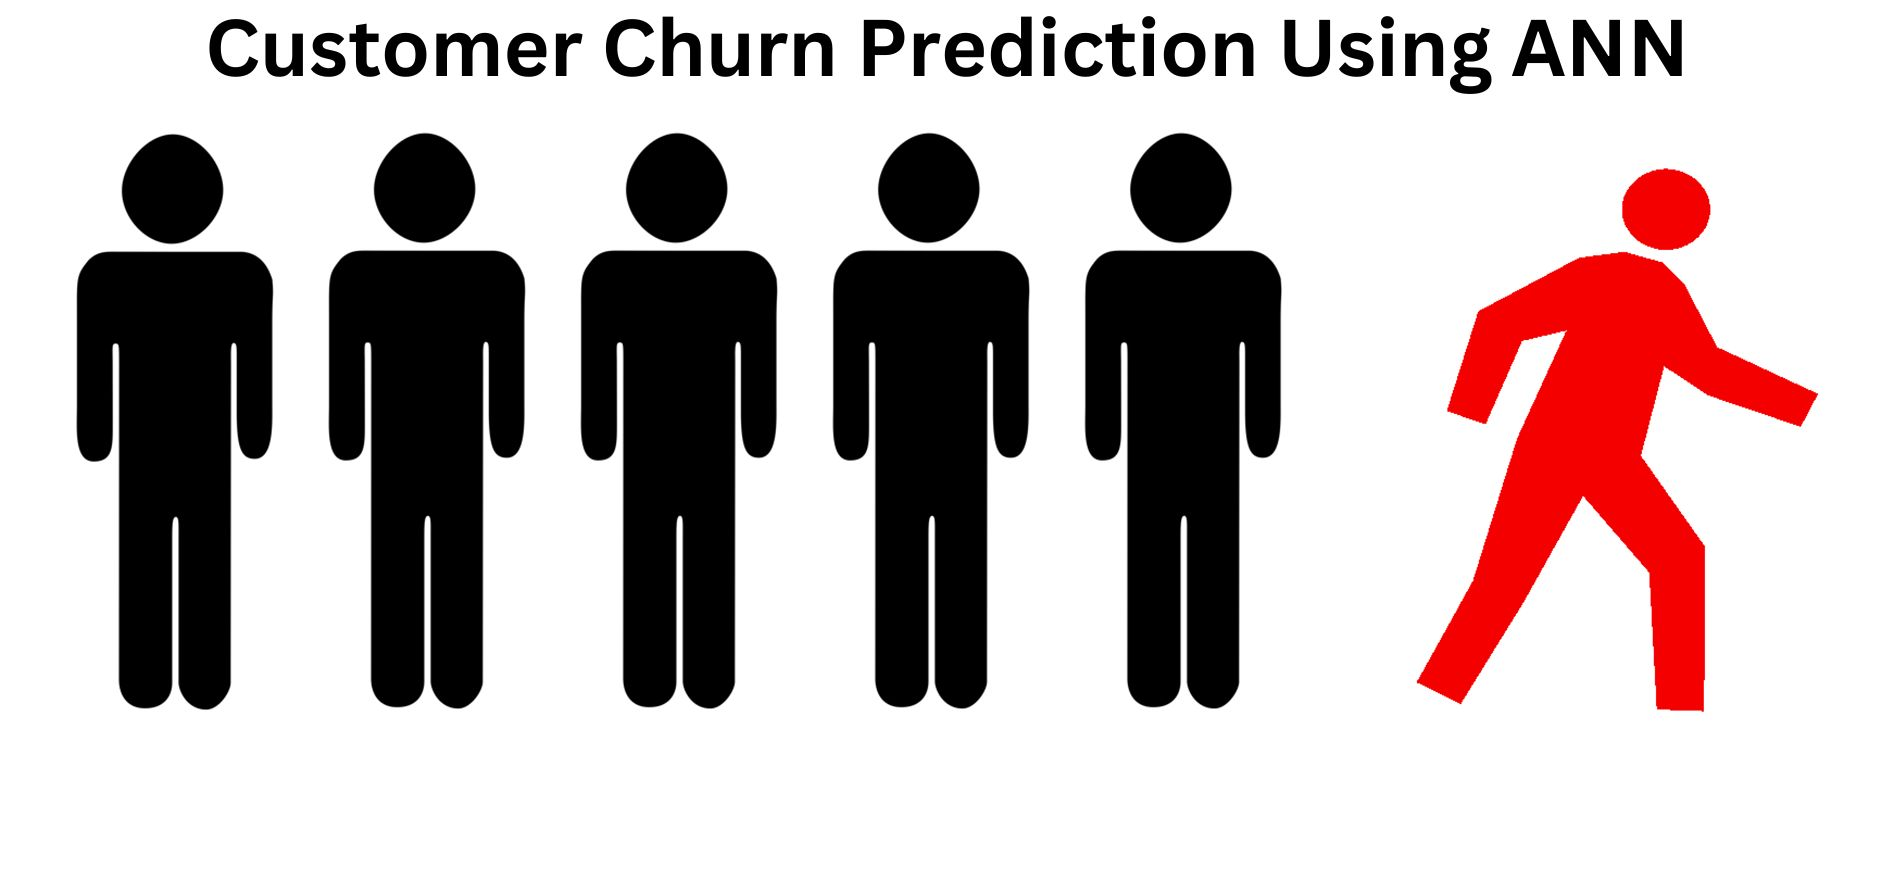

# **Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **Data Analysis & Visualization**

In [ ]:
# read the dataset
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

# see the first five rows of df
df.head()

In [ ]:
# see the shape of df
df.shape

In [ ]:
# see the information of df
df.info()

In [ ]:
# see the descriptive statistics of df
df.describe()

In [ ]:
# see the duplicates values in dataset if exist then remove otherwise not.
df.duplicated().sum()

In [ ]:
# check the null values in the each columns of dataset if exist then remove otherwise not.
df.isnull().sum()

In [ ]:
# drop the irrelevant columns 
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

In [ ]:
# check again the first five rows of df after drop the irrelevant columns
df.head()

In [ ]:
# check the value counts of "Geography" column.
df_geography = df['Geography'].value_counts()
df_geography

In [ ]:
# let's perform univarient eda on "Geography" column. 
plt.figure(figsize=(12,6))
res=sns.barplot(x=df_geography, y=df_geography.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Customers Geographically',fontsize = 16, color='black')
plt.ylabel('Geography Names',fontsize = 16, color='black')
plt.title('Customers Geographically Data',fontsize = 16, color='black')
plt.show()

In [ ]:
# check the value counts of "Gender" column.
df_gender = df['Gender'].value_counts()
df_gender

In [ ]:
# let's perform univarient eda on "Gender" column. 
plt.figure(figsize=(12,6))
res=sns.barplot(x=df_gender, y=df_gender.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Customers Gender',fontsize = 16, color='black')
plt.ylabel('Gender Names',fontsize = 16, color='black')
plt.title('Customers Genders Data',fontsize = 16, color='black')
plt.show()

In [ ]:
# check the value counts of "number of products" column.
df_nop = df['NumOfProducts'].value_counts()
df_nop

In [ ]:
# let's perform univarient eda on "number of products" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_nop, x=df_nop.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customers Usage of Bank Products',fontsize = 16, color='black')
plt.xlabel('Product Value',fontsize = 16, color='black')
plt.title('How many products of bank customer use',fontsize = 16, color='black')
plt.show()

In [ ]:
# check the value counts of "HasCrCard" column.
df_crc = df['HasCrCard'].value_counts()
df_crc

In [ ]:
# let's perform univarient eda on "HasCrCard" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_crc, x=df_crc.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customers Has a Credit Card or Not',fontsize = 16, color='black')
plt.xlabel('Customer have credit card or not',fontsize = 16, color='black')
plt.title('How many customers have credit cards',fontsize = 16, color='black')
plt.show()

In [ ]:
# check the value counts of "IsActiveMember" column.
df_iam = df['IsActiveMember'].value_counts()
df_iam

In [ ]:
# let's perform univarient eda on "IsActiveMember" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_iam, x=df_iam.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer IsActiveMember or Not',fontsize = 16, color='black')
plt.xlabel('Customer IsActiveMember or Not',fontsize = 16, color='black')
plt.title('How many customers is Active or Not Active',fontsize = 18, color='black')
plt.show()

In [ ]:
# check the value counts of "Exited" target column.
df_exit = df['Exited'].value_counts()
df_exit

In [ ]:
# # let's perform univarient eda on "Exited" target column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer Churn or Not',fontsize = 16, color='black')
plt.xlabel('Customer Curn or Not',fontsize = 16, color='black')
plt.title('How many customers is Churn or Not Churn',fontsize = 18, color='black')
plt.show()

# **Apply One Hot Encoding Technique on Gender & Geography Column**

In [ ]:
# use pandas dummies funtion for one hot encodeing 
df = pd.get_dummies(df, columns=["Gender", "Geography"], drop_first=True)

In [ ]:
# check again the df after one hot encoding method apply
df.head()

# **Let's Handle the Imbalanced Target Column and Balanced it**

In [ ]:
# Separate majority and minority classes
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number of majority class samples
                              random_state=42)  # Set random state for reproducibility

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_class, upsampled_minority])

In [ ]:
# check the target_balanced_data
balanced_data

In [ ]:
# see the duplicates values after the balancing the data and in dataset if exist then remove otherwise not.
df.duplicated().sum()

In [ ]:
# check the null values after the balancing the data and in the each columns of dataset if exist then remove otherwise not.
df.isnull().sum()

In [ ]:
# check again the value counts of "Exited" target column after the balancing the data.
df_exit = balanced_data['Exited'].value_counts()
df_exit

In [ ]:
# # let's perform univarient eda on "Exited" target column after the balancing the data.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer Churn or Not',fontsize = 16, color='black')
plt.xlabel('Customer Curn or Not',fontsize = 16, color='black')
plt.title('How many customers is Churn or Not Churn',fontsize = 18, color='black')
plt.show()

# **Split the Data for model Training and Testing**

In [ ]:
# # split the feature in x variable and target varible in y variable
y = balanced_data['Exited']
X = balanced_data.drop('Exited',axis=1)

In [ ]:
# use sklearn for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

### **Apply Sklearn Standard Scaler Technique for Standarized the Input Features Values**

In [ ]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# check the X_train_scaled values
X_train_scaled

In [ ]:
# check the X_est_scaled values
X_test_scaled

In [ ]:
# see the shape of balanced data
balanced_data.shape

# **Model Building - Artificial - Neural - Network - ANN**

In [ ]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.2)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.layers[0].get_weights()

In [ ]:
model.layers[1].get_weights()

In [ ]:
y_log = model.predict(X_test_scaled)

In [ ]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [ ]:
accuracy_score(y_test, y_pred)

# **Thanks for Reading my Notebook**